# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model 

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

In [1]:
#!pip install pyforest
#!pip install cufflinks

In [2]:
import pyforest
import plotly
import cufflinks as cf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

#To display the plots
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
df_m = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1')
df_f= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

print("df_m shape" , df_m.shape)
print("df_f shape" , df_f.shape)

df_m shape (4082, 108)
df_f shape (1986, 108)


In [4]:
df_m.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [5]:
df_f.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

# EDA

- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [6]:
df_columns_names=pd.concat([pd.DataFrame(df_f.columns), pd.DataFrame(df_m.columns)], axis = 1)
df_columns_names

,0,0
0,SubjectId,subjectid
1,abdominalextensiondepthsitting,abdominalextensiondepthsitting
2,acromialheight,acromialheight
3,acromionradialelength,acromionradialelength
4,anklecircumference,anklecircumference
5,axillaheight,axillaheight
6,balloffootcircumference,balloffootcircumference
7,balloffootlength,balloffootlength
8,biacromialbreadth,biacromialbreadth
9,bicepscircumferenceflexed,bicepscircumferenceflexed


In [7]:
df = pd.concat([df_m, df_f])
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372

In [8]:
df.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference', 'SubjectId'], dtype='object', length=109)

In [9]:
df[["subjectid", "SubjectId"]]      

,subjectid,SubjectId
0,10027.0,NaN
1,10032.0,NaN
2,10033.0,NaN
3,10092.0,NaN
4,10093.0,NaN
...,...,...
1981,NaN,29501.0
1982,NaN,29502.0
1983,NaN,29503.0
1984,NaN,29511.0


In [10]:
df.drop(["subjectid", "SubjectId"], axis=1, inplace = True)

In [11]:
df.shape

(6068, 107)

In [12]:
df.isnull().sum().any(), df.duplicated().sum()

(True, 0)

In [13]:
df.isnull().sum()

abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth                           0
chestheight              

In [14]:
NaN_list =[]

for columns in df.columns:
    if df[columns].isnull().sum()>0:
        print("{name} = {quantity}".format(name = columns, quantity = df[columns].isnull().sum()))
        NaN_list.append(columns)

Ethnicity = 4647


In [15]:
df.drop(["Ethnicity"], axis = 1, inplace = True)

In [16]:
df.isnull().sum().any()

False

In [17]:
df.shape

(6068, 106)

In [18]:
df[["SubjectNumericRace", "DODRace"]]

,SubjectNumericRace,DODRace
0,1,1
1,1,1
2,2,2
3,1,1
4,2,2
...,...,...
1981,3,3
1982,3,3
1983,2,2
1984,3,3


In [19]:
df[df["SubjectNumericRace"] == df["DODRace"]].any().any()

True

In [20]:
df.drop(["SubjectNumericRace"], axis = 1, inplace = True)

In [21]:
df.shape

(6068, 105)

In [22]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [23]:
df = df[df.DODRace < 4]

# df = df[df["DODRace"].isin([1,2,3])]

In [24]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [25]:
df.shape

(5769, 105)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 1985
Columns: 105 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: int64(97), object(8)
memory usage: 4.7+ MB


In [27]:
#!pip install researchpy
import researchpy as rp                                      

object_columns = df.select_dtypes(include='object')
rp.summary_cat(object_columns)                         

,Variable,Outcome,Count,Percent
0,Gender,Male,3899,67.59
1,,Female,1870,32.41
2,Date,5-Apr-12,43,0.75
3,,5-Mar-12,43,0.75
4,,28-Feb-12,42,0.73
5,,26-May-11,40,0.69
6,,21-Feb-12,40,0.69
7,,6-Mar-12,40,0.69
8,,26-Mar-12,39,0.68
9,,15-Mar-11,39,0.68


In [28]:
for columns in object_columns:
    print(f"{columns:<25}:", df[columns].nunique())                              # <25 ile : önündeki boşluklar ayarlanıyor
#   print(f"{columns} has {df[columns].nunique()} unique value")                 # farklı bir gösterim

Gender                   : 2
Date                     : 253
Installation             : 12
Component                : 3
Branch                   : 3
PrimaryMOS               : 281
SubjectsBirthLocation    : 136
WritingPreference        : 3


In [29]:
df.drop(["Date", "Installation", "Component", "Branch", "PrimaryMOS", "WritingPreference"], axis = 1, inplace=True)

In [30]:
df.shape

(5769, 99)

In [31]:
df.Gender.value_counts()

Male      3899
Female    1870
Name: Gender, dtype: int64

In [32]:
for columns in df.select_dtypes(exclude = [object]):
    print(columns)

abdominalextensiondepthsitting
acromialheight
acromionradialelength
anklecircumference
axillaheight
balloffootcircumference
balloffootlength
biacromialbreadth
bicepscircumferenceflexed
bicristalbreadth
bideltoidbreadth
bimalleolarbreadth
bitragionchinarc
bitragionsubmandibulararc
bizygomaticbreadth
buttockcircumference
buttockdepth
buttockheight
buttockkneelength
buttockpopliteallength
calfcircumference
cervicaleheight
chestbreadth
chestcircumference
chestdepth
chestheight
crotchheight
crotchlengthomphalion
crotchlengthposterioromphalion
earbreadth
earlength
earprotrusion
elbowrestheight
eyeheightsitting
footbreadthhorizontal
footlength
forearmcenterofgriplength
forearmcircumferenceflexed
forearmforearmbreadth
forearmhandlength
functionalleglength
handbreadth
handcircumference
handlength
headbreadth
headcircumference
headlength
heelanklecircumference
heelbreadth
hipbreadth
hipbreadthsitting
iliocristaleheight
interpupillarybreadth
interscyei
interscyeii
kneeheightmidpatella
kneeheights

In [33]:
df[["weightkg","Weightlbs"]]

,weightkg,Weightlbs
0,815,180
1,726,160
2,929,205
3,794,175
4,946,213
...,...,...
1981,832,180
1982,717,150
1983,762,168
1984,632,133


In [34]:
df[["Heightin","stature"]]

,Heightin,stature
0,71,1776
1,68,1702
2,68,1735
3,66,1655
4,77,1914
...,...,...
1981,67,1687
1982,63,1613
1983,66,1644
1984,63,1616


In [35]:
df.drop(['Weightlbs','Heightin'], axis = 1, inplace = True)

In [36]:
df["weightkg"].head()

0    815
1    726
2    929
3    794
4    946
Name: weightkg, dtype: int64

In [37]:
df["weightkg"] = df["weightkg"]/10

In [38]:
df["weightkg"].head()

0    81.5
1    72.6
2    92.9
3    79.4
4    94.6
Name: weightkg, dtype: float64

In [39]:
df.shape

(5769, 97)

In [40]:
# function for set text color of positive
# values in Dataframes

def color_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for positive
    strings, black otherwise.
    """
    if (1> val > 0.9) or (-0.9 > val > -1):
        color = 'red'
        
    elif val==1:
        color='blue'
        
    else:
        color = 'black'                                              # jupiter note book kullananlar black yapmalı
        
    return 'color: %s' % color

pd.DataFrame(df).corr().style.applymap(color_red)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting


In [41]:
df_corr = df.corr()

count = 0
feature =[]
collinear=[]
for columns in df_corr.columns:
    
    for i in df_corr.index:
        
        if (1 > df_corr[columns][i] > 0.9) or (-0.9 > df_corr[columns][i] > -1) :
                feature.append(columns)
                collinear.append(i)
                count += 1
                #print(f"multicolinearity alert in between {columns} - {i}")    # bununla aralarında yüksek korelasyon olan sütunlar tektek yazdırılıyor
                
print("Number of strong corelated features:", count)

Number of strong corelated features: 286


In [42]:
df_corr = pd.DataFrame([feature, collinear], index=["feature","collinear"]).T
df_corr

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight
5,acromialheight,iliocristaleheight
6,acromialheight,kneeheightsitting
7,acromialheight,stature
8,acromialheight,suprasternaleheight
9,acromialheight,tenthribheight


In [43]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,81.5,175,853,Male,North Dakota,1,41
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,72.6,167,815,Male,New York,1,35
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,92.9,180,831,Male,New York,2,42
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,79.4,176,793,Male,Wisconsin,1,31
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,94.6,188,954,Male,North Carolina,2,21


In [44]:
df2 = df.copy()

In [45]:
df = pd.get_dummies(df, drop_first =True)

In [46]:
df.shape

(5769, 231)

In [47]:
df.isnull().any().any()

False

In [48]:
#!pip install movecolumn
import movecolumn as mc

df = mc.MoveToLast(df,'DODRace')

In [49]:
df["DODRace"] = df.DODRace.map({1 : 0, 2 : 1, 3 : 2})

In [50]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Gender_Male,SubjectsBirthLocation_Alaska,SubjectsBirthLocation_Antigua and Barbuda,SubjectsBirthLocation_Argentina,SubjectsBirthLocation_Arizona,SubjectsBirthLocation_Arkansas,SubjectsBirthLocation_Azerbaijan,SubjectsBirthLocation_Bahamas,SubjectsBirthLocation_Barbados,SubjectsBirthLocation_Belarus,SubjectsBirthLocation_Belgium,SubjectsBirthLocation_Belize,SubjectsBirthLocation_Bermuda,SubjectsBirthLocation_Bolivia,SubjectsBirthLocation_Bosnia and Herzegovina,SubjectsBirthLocation_Brazil,SubjectsBirthLocation_British Virgin Islands,SubjectsBirthLocation_Bulgaria,SubjectsBirthLocation_California,SubjectsBirthLocation_Cameroon,SubjectsBirthLocation_Canada,SubjectsBirthLocation_Cape Verde,SubjectsBirthLocation_Chile,SubjectsBirthLocation_Colombia,SubjectsBirthLocation_Colorado,SubjectsBirthLocation_Connecticut,SubjectsBirthLocation_Costa Rica,SubjectsBirthLocation_Cuba,SubjectsBirthLocation_Delaware,SubjectsBirthLocation_Denmark,SubjectsBirthLocation_District of Columbia,SubjectsBirthLocation_Dominica,SubjectsBirthLocation_Dominican Republic,SubjectsBirthLocation_Ecuador,SubjectsBirthLocation_Egypt,SubjectsBirthLocation_El Salvador,SubjectsBirthLocation_Ethiopia,SubjectsBirthLocation_Florida,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iran,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirthLocation_Michigan,SubjectsBirthLocation_Minnesota,S

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [51]:
X = df.drop("DODRace", axis = 1)
y = df.DODRace

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y ,random_state=42)

<IPython.core.display.Javascript object>

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [53]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print()
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 1. Logistic model

### Vanilla Logistic Model

In [58]:
from sklearn.pipeline import Pipeline

operations = [("scaler", MinMaxScaler()), ("log_pipeline", LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42))]

pipe_model=Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

y_pred = pipe_model.predict(X_test)

eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[626  25 107]
 [  6 241  13]
 [ 27   9 100]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       758
           1       0.88      0.93      0.90       260
           2       0.45      0.74      0.56       136

    accuracy                           0.84      1154
   macro avg       0.76      0.83      0.78      1154
weighted avg       0.87      0.84      0.85      1154


Train_Set
[[2638   60  336]
 [  30  968   40]
 [  56   21  466]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3034
           1       0.92      0.93      0.93      1038
           2       0.55      0.86      0.67       543

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [59]:
f1_2 = make_scorer(f1_score, average=None, labels=[2])
precision_2 = make_scorer(precision_score, average=None, labels=[2])
recall_2 = make_scorer(recall_score, average=None, labels=[2])

scores = cross_validate(pipe_model, X_train, y_train, scoring = {'f1_2':f1_2, 
                                                                 'precision_2':precision_2, 
                                                                 'recall_2':recall_2}, 
                                                                 cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_2           0.621272
test_precision_2    0.514768
test_recall_2       0.784579
dtype: float64

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Logistic Model GridsearchCV

In [150]:
operations = [("scaler", MinMaxScaler()), ("log_pipeline", LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42))]

pipe_model=Pipeline(steps=operations)

f1_2 = make_scorer(f1_score, average=None, labels=[2])

C = np.logspace(-1, 5, 20)
penalty = ["l1", "l2"]
class_weight= ["balanced", None]
solver = ["liblinear", "saga"]

param_grid = {'log_pipeline__C': C,
              'log_pipeline__penalty': penalty,
              'log_pipeline__class_weight':class_weight,
              'log_pipeline__solver': solver }

LOGpipe_model_grid = GridSearchCV(pipe_model, param_grid, scoring = f1_2, cv = 5,  n_jobs = -1)

In [151]:
LOGpipe_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log_pipeline',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log_pipeline__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'log_pipeline__class_weight': ['balanced', None],
                         'log_pipeline__penalty': ['l1', 'l2'],
                         'log_pipeline__solver': ['libl

In [152]:
LOGpipe_model_grid.best_score_

0.6861932935133976

In [153]:
LOGpipe_model_grid.best_params_

{'log_pipeline__C': 7.847599703514611,
 'log_pipeline__class_weight': 'balanced',
 'log_pipeline__penalty': 'l2',
 'log_pipeline__solver': 'liblinear'}

In [154]:
eval_metric(LOGpipe_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[698  16  44]
 [ 14 244   2]
 [ 42   9  85]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       758
           1       0.91      0.94      0.92       260
           2       0.65      0.62      0.64       136

    accuracy                           0.89      1154
   macro avg       0.83      0.83      0.83      1154
weighted avg       0.89      0.89      0.89      1154


Train_Set
[[2869   36  129]
 [  38  984   16]
 [ 112   24  407]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3034
           1       0.94      0.95      0.95      1038
           2       0.74      0.75      0.74       543

    accuracy                           0.92      4615
   macro avg       0.88      0.88      0.88      4615
weighted avg       0.92      0.92      0.92      4615



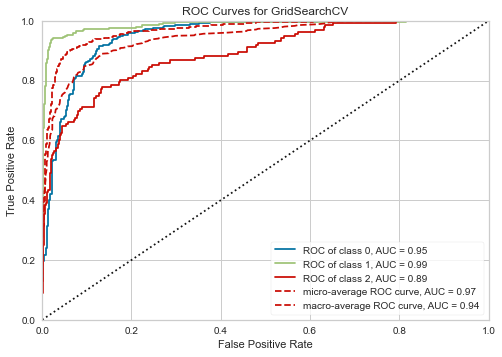

In [219]:
from yellowbrick.classifier import ROCAUC

model = LOGpipe_model_grid
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

## 2. SVC

In [ ]:
from sklearn.svm import SVC

### Vanilla SVC model 

In [81]:
# from sklearn.pipeline import Pipeline

operations = [("scaler", MinMaxScaler()), ("SVC_pipeline", SVC(random_state=42))]
SVCpipe_model=Pipeline(steps=operations)

SVCpipe_model.fit(X_train, y_train)

y_pred = SVCpipe_model.predict(X_test)

eval_metric(SVCpipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[743  13   2]
 [ 31 229   0]
 [ 84   9  43]]
              precision    recall  f1-score   support

           1       0.87      0.98      0.92       758
           2       0.91      0.88      0.90       260
           3       0.96      0.32      0.48       136

    accuracy                           0.88      1154
   macro avg       0.91      0.73      0.76      1154
weighted avg       0.89      0.88      0.86      1154


Train_Set
[[3011   17    6]
 [ 111  924    3]
 [ 350   29  164]]
              precision    recall  f1-score   support

           1       0.87      0.99      0.93      3034
           2       0.95      0.89      0.92      1038
           3       0.95      0.30      0.46       543

    accuracy                           0.89      4615
   macro avg       0.92      0.73      0.77      4615
weighted avg       0.90      0.89      0.87      4615



###  SVC Model GridsearchCV

In [137]:
operations = [("scaler", MinMaxScaler()), ("SVC_pipeline", SVC(probability=True, class_weight="balanced", random_state=42))]
pipe_model=Pipeline(steps=operations)

f1_2 = make_scorer(f1_score, average=None, labels=[2])
#precision_2 = make_scorer(precision_score, average=None, labels=[2])
#recall_2 = make_scorer(recall_score, average=None, labels=[2])

#scoring = {'SVC_f1_2':f1_2, 'SVC_precision_2':precision_2, 'SVC_recall_2':recall_2}

param_grid = {'SVC_pipeline__C': [0.01, 0.05, 0.1, 0.3, 1],
              'SVC_pipeline__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC_pipeline__kernel': ['rbf', 'linear']}

SVCpipe_model_grid = GridSearchCV(pipe_model, param_grid, 
                                  scoring = f1_2, verbose=2, n_jobs = -1)

In [138]:
SVCpipe_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC_pipeline',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'SVC_pipeline__C': [0.01, 0.05, 0.1, 0.3, 1],
                         'SVC_pipeline__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC_pipeline__kernel': ['rbf', 'linear']},
             scoring=make_scorer(f1_score, average=None, labels=[2]),
             verbose=2)

In [139]:
eval_metric(SVCpipe_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[636  19 103]
 [ 13 237  10]
 [ 31   8  97]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.88       758
           1       0.90      0.91      0.90       260
           2       0.46      0.71      0.56       136

    accuracy                           0.84      1154
   macro avg       0.76      0.82      0.78      1154
weighted avg       0.87      0.84      0.85      1154


Train_Set
[[2632   53  349]
 [  32  970   36]
 [  52   16  475]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3034
           1       0.93      0.93      0.93      1038
           2       0.55      0.87      0.68       543

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [140]:
SVCpipe_model_grid.best_params_

{'SVC_pipeline__C': 1,
 'SVC_pipeline__gamma': 'scale',
 'SVC_pipeline__kernel': 'linear'}

In [141]:
SVCpipe_model_grid.best_score_

0.6131733023498092

## 3. RF

In [207]:
df2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,81.5,175,853,Male,North Dakota,1,41
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,72.6,167,815,Male,New York,1,35
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,92.9,180,831,Male,New York,2,42
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,79.4,176,793,Male,Wisconsin,1,31
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,94.6,188,954,Male,North Carolina,2,21


In [208]:
from sklearn.preprocessing import OrdinalEncoder

objectColumns = df2.select_dtypes("object").columns
objectColumns

encoder = OrdinalEncoder()
df2[objectColumns] = encoder.fit_transform(df2[objectColumns])            
df2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,81.5,175,853,1.0,91.0,1,41
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,72.6,167,815,1.0,86.0,1,35
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,92.9,180,831,1.0,86.0,2,42
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,79.4,176,793,1.0,133.0,1,31
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,94.6,188,954,1.0,90.0,2,21


In [209]:
df2["DODRace"] = df2.DODRace.map({1 : 0, 2 : 1, 3 : 2})

In [210]:
X2 = df2.drop("DODRace", axis = 1)
y2 = df2.DODRace

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, stratify = y2 ,random_state=42)

<IPython.core.display.Javascript object>

### Vanilla RF Model

In [211]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=42)

rf_model.fit(X2_train, y2_train)

eval_metric(rf_model, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[745  11   2]
 [ 79 181   0]
 [123   9   4]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       758
           1       0.90      0.70      0.79       260
           2       0.67      0.03      0.06       136

    accuracy                           0.81      1154
   macro avg       0.78      0.57      0.57      1154
weighted avg       0.80      0.81      0.76      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### RF Model GridsearchCV

In [212]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)

param_grid = {'n_estimators':[50, 64, 100, 128, 300, 400, 500],     
             'max_features':[2, 3, 4, "auto"],             
             'max_depth':[3, 6, 9, 12, 15],
             'min_samples_split':[5, 10, 15, 20]}

f1_2 = make_scorer(f1_score, average=None, labels=[2])


RF3_model_grid = GridSearchCV(model, param_grid, scoring = f1_2, n_jobs = -1, verbose = 2)

In [213]:
RF3_model_grid.fit(X2_train, y2_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12, 15],
                         'max_features': [2, 3, 4, 'auto'],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [50, 64, 100, 128, 300, 400, 500]},
             scoring=make_scorer(f1_score, average=None, labels=[2]),
             verbose=2)

In [216]:
eval_metric(RF3_model_grid, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[631  41  86]
 [ 36 209  15]
 [ 73  15  48]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       758
           1       0.79      0.80      0.80       260
           2       0.32      0.35      0.34       136

    accuracy                           0.77      1154
   macro avg       0.65      0.66      0.66      1154
weighted avg       0.78      0.77      0.77      1154


Train_Set
[[2812   45  177]
 [  38  990   10]
 [  48    4  491]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3034
           1       0.95      0.95      0.95      1038
           2       0.72      0.90      0.80       543

    accuracy                           0.93      4615
   macro avg       0.88      0.93      0.90      4615
weighted avg       0.94      0.93      0.93      4615



In [217]:
RF3_model_grid.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 15,
 'n_estimators': 500}

In [218]:
RF3_model_grid.best_score_

0.39336922857409373

## 4. XGBoost

In [60]:
from xgboost import XGBClassifier

### Vanilla XGBoost Model

In [61]:
XGB_model = XGBClassifier(random_state=42)

XGB_model.fit(X_train, y_train)

eval_metric(XGB_model, X_train, y_train, X_test, y_test)

Test_Set
[[738  12   8]
 [ 28 231   1]
 [ 70  11  55]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       758
           1       0.91      0.89      0.90       260
           2       0.86      0.40      0.55       136

    accuracy                           0.89      1154
   macro avg       0.88      0.76      0.79      1154
weighted avg       0.89      0.89      0.88      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### XGBoost Model GridsearchCV

In [142]:
XGB_model = XGBClassifier(random_state=42)

param_grid = {"n_estimators":[50, 100, 200, 300],
              'max_depth':[2,3,4,5], 
              "learning_rate": [0.1, 0.2, 0.3],
              "subsample":[0.5, 0.8, 1], 
              "colsample_bytree":[0.5,0.7, 1]} 

f1_2 = make_scorer(f1_score, average=None, labels=[2])

XGB_model_grid = GridSearchCV(XGB_model, param_grid, scoring = f1_2 , refit = True, verbose=2, n_jobs = -1)

In [143]:
XGB_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     r

In [144]:
eval_metric(XGB_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[724  15  19]
 [ 21 235   4]
 [ 70  13  53]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       758
           1       0.89      0.90      0.90       260
           2       0.70      0.39      0.50       136

    accuracy                           0.88      1154
   macro avg       0.83      0.75      0.77      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[3027    2    5]
 [  11 1027    0]
 [  45    5  493]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3034
           1       0.99      0.99      0.99      1038
           2       0.99      0.91      0.95       543

    accuracy                           0.99      4615
   macro avg       0.99      0.97      0.98      4615
weighted avg       0.99      0.99      0.99      4615



In [145]:
XGB_model_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 2,
 'n_estimators': 300,
 'subsample': 0.5}

In [146]:
XGB_model_grid.best_score_

0.5768772252628614

## Final Model

- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.

In [55]:
from sklearn.pipeline import Pipeline

operations = [("scaler", MinMaxScaler()), ("final_model", LogisticRegression(C = 7.847599703514611, class_weight='balanced', 
                                                                              penalty = "l2", solver = "liblinear", 
                                                                              max_iter=10000, random_state=42))]

final_model=Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('final_model',
                 LogisticRegression(C=7.847599703514611,
                                    class_weight='balanced', max_iter=10000,
                                    random_state=42, solver='liblinear'))])

In [57]:
f1_2 = make_scorer(f1_score, average=None, labels=[2])
precision_2 = make_scorer(precision_score, average=None, labels=[2])
recall_2 = make_scorer(recall_score, average=None, labels=[2])

scores = cross_validate(final_model, X, y, scoring = {'f1_2':f1_2, 
                                                      'precision_2':precision_2, 
                                                      'recall_2':recall_2}, 
                                                      cv = 5)

df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_2           0.632737
test_precision_2    0.620392
test_recall_2       0.656950
dtype: float64